## 카페 매출액
이 데이터는 메이븐 애널리틱스 웹사이트에서 가져온 것입니다

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('RdBu')
import warnings
warnings.filterwarnings('ignore')

In [38]:
#conda install openpyxl

In [39]:
data = pd.read_excel('/Users/leejieun/kaggle-notebooks/datasets/ahmedabbas757/coffee-sales/Coffee Shop Sales.xlsx')

In [40]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [41]:
data.shape

(149116, 11)

In [42]:
data.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [44]:
data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
transaction_id,149116.0,74737.371872,1.0,37335.75,74727.5,112094.25,149456.0,43153.600016
transaction_date,149116,2023-04-15 11:50:32.173609984,2023-01-01 00:00:00,2023-03-06 00:00:00,2023-04-24 00:00:00,2023-05-30 00:00:00,2023-06-30 00:00:00,NaN
transaction_qty,149116.0,1.438276,1.0,1.0,1.0,2.0,8.0,0.542509
store_id,149116.0,5.342063,3.0,3.0,5.0,8.0,8.0,2.074241
product_id,149116.0,47.918607,1.0,33.0,47.0,60.0,87.0,17.93002
unit_price,149116.0,3.382219,0.8,2.5,3.0,3.75,45.0,2.658723


In [45]:
data.duplicated().sum()

0

In [46]:
data.nunique()

transaction_id      149116
transaction_date       181
transaction_time     25762
transaction_qty          6
store_id                 3
store_location           3
product_id              80
unit_price              41
product_category         9
product_type            29
product_detail          80
dtype: int64

In [47]:
columnValue = data.nunique().reset_index()
columnValue.rename(columns = {'index': 'Column _name', 0 : 'Unique values'}, inplace=True)
columnValue

,Column _name,Unique values
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [48]:
data.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [49]:
data.describe(include=object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [50]:
data.drop(columns=['transaction_id', 'store_id', 'product_id'], inplace=True)

In [51]:
def count_plot(x_axis =None, y_axis=None, hue=None, rotation=0, top=None):
    if x_axis:
        order = data[x_axis].value_counts().iloc[:top].index
    else:
        order = data[y_axis].value_counts().iloc[:top].index
        
    graph = sns.countplot(x = x_axis, y= y_axis, data= data, hue = hue, order= order, palette='RdBu')
    for container in graph.containers:
        graph.bar_label(container)
        
    plt.xticks(rotation= rotation)
    plt.show()

In [52]:
def pie_plot(column_name, explodeIndex=None):
    explodeList = [0] * data[column_name].nunique()
    if explodeIndex is not None:
        explodeList[explodeIndex] = 0.1
        
        plt.pie(data[column_name].value_counts(), labels= data[column_name].value_counts().index, shadow=True, autopct="%1.1f%%", explode= explodeList)
        plt.show()

In [53]:
data['year'] = data['transaction_date'].dt.year
data['month'] = data['transaction_date'].dt.month_name()
data['day'] = data['transaction_date'].dt.day_name()

In [54]:
data['year'].unique()

array([2023], dtype=int32)

In [55]:
data['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

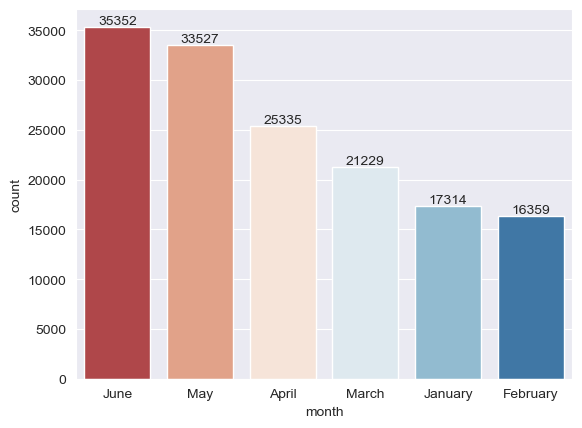

In [57]:
count_plot(x_axis='month')

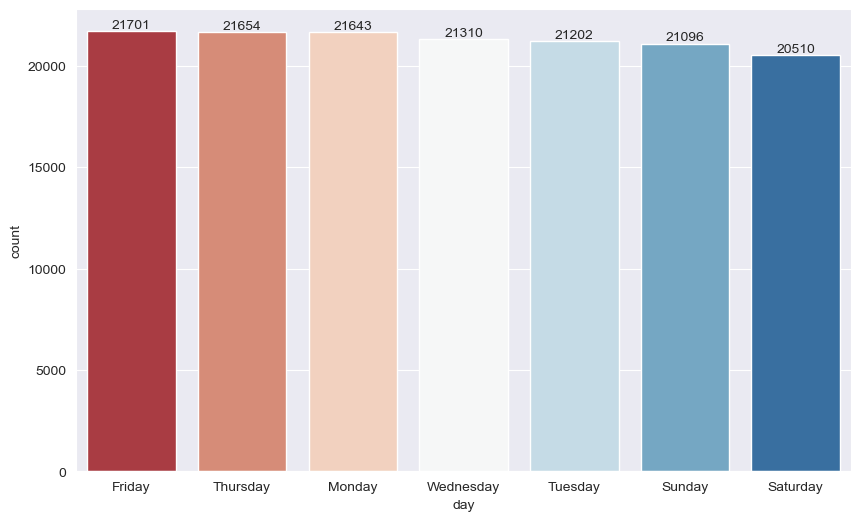

In [60]:
plt.figure(figsize=(10,6))
count_plot(x_axis='day')

In [61]:
data.drop(columns= 'transaction_date', inplace=True)

In [62]:
data['transaction_time'].unique()[:50]

array([datetime.time(7, 6, 11), datetime.time(7, 8, 56),
       datetime.time(7, 14, 4), datetime.time(7, 20, 24),
       datetime.time(7, 22, 41), datetime.time(7, 25, 49),
       datetime.time(7, 33, 34), datetime.time(7, 39, 13),
       datetime.time(7, 39, 34), datetime.time(7, 43, 5),
       datetime.time(7, 44, 35), datetime.time(7, 45, 51),
       datetime.time(7, 48, 19), datetime.time(7, 52, 36),
       datetime.time(7, 59, 58), datetime.time(8, 0, 18),
       datetime.time(8, 0, 39), datetime.time(8, 11, 45),
       datetime.time(8, 17, 27), datetime.time(8, 24, 26),
       datetime.time(8, 29, 38), datetime.time(8, 31, 23),
       datetime.time(8, 33, 8), datetime.time(8, 35, 3),
       datetime.time(8, 41, 57), datetime.time(8, 52, 3),
       datetime.time(8, 52, 32), datetime.time(8, 54, 33),
       datetime.time(8, 56, 27), datetime.time(8, 57, 46),
       datetime.time(8, 58, 55), datetime.time(9, 0, 12),
       datetime.time(9, 0, 24), datetime.time(9, 7, 13),
       da

In [63]:
data['hour'] = data['transaction_time'].apply(lambda x : x.hour)

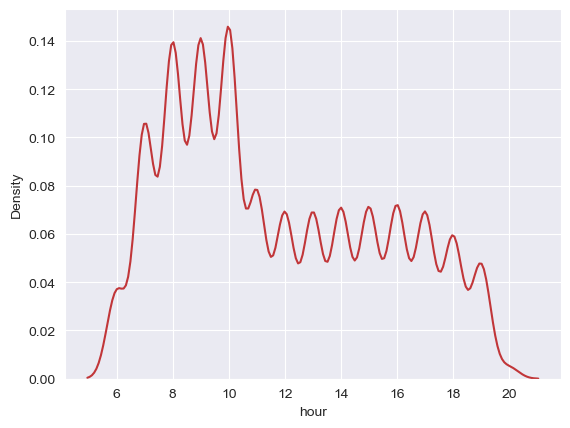

In [64]:
sns.kdeplot(data['hour'])
plt.show()

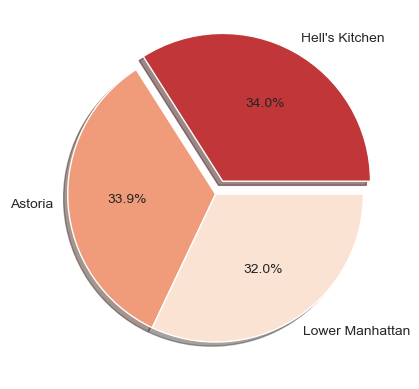

In [65]:
pie_plot(column_name='store_location', explodeIndex=0)

In [66]:
data['unit_price'].unique()

array([ 3.  ,  3.1 ,  4.5 ,  2.  ,  4.25,  3.5 ,  2.55,  3.75,  2.5 ,
        4.75,  3.25,  4.  ,  2.2 ,  2.45,  0.8 ,  8.95, 21.  , 28.  ,
        6.4 , 19.75, 12.  , 18.  ,  9.5 , 10.  , 20.45,  9.25, 22.5 ,
       14.75,  7.6 , 14.  , 10.95, 13.33, 15.  ,  4.38,  4.06,  5.63,
        4.69, 45.  , 23.  ,  2.1 ,  2.65])

<Axes: ylabel='unit_price'>

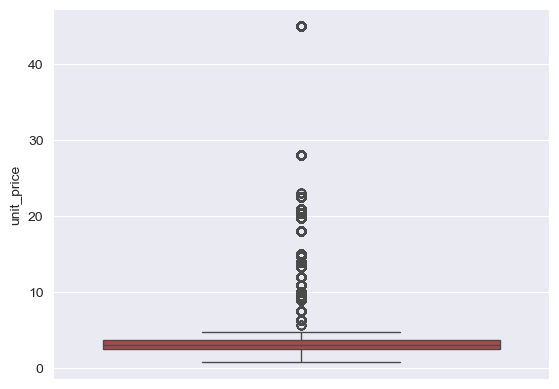

In [67]:
sns.boxplot(y='unit_price', data=data)